In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
import missingno as msno

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [2]:
#Supressing warnings
warnings.filterwarnings('ignore') 

In [3]:
# assigning url to a variable
fp='https://archive.ics.uci.edu/static/public/73/data.csv'
# passing parameter to the function
mush = pd.read_csv(fp)

In [4]:
mush.to_csv('C:\\Users\\gmiel\\OneDrive\\WGU_MSDA\\D214 - Data Analytics Graduate Capstone\\Output\\Mush.csv',  index=False)

In [5]:
#Taking a look at some of the values in the fields
with pd.option_context('display.max_columns', None):
  display(mush)

cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e        NaN   
8120            c         b          y           e        NaN   
8121            c         b          n           e        NaN   
8122            c         n          b           t        NaN   
8123            c         b          y           e        NaN   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat poisonous  
0                    k          s       u         p  
1                    n          n       g         e  
2                    n          n       m         e  
3                    k          s       u         p  
4                    n          a       g         e  
...                ...        ...     ...       ...  
8119                 b          c       l         e  
8120                 b          v       l         e  
8121                 b          c       l      

In [6]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
mush.columns = mush.columns.str.replace("[-]", "_")

In [8]:
mush.duplicated().value_counts()

False    8124
dtype: int64

<span style="color:blue">Detecting and mitigating missing values</span>

In [9]:
print(mush.isna().sum())
#Looks like this data set has no missing values

cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


In [10]:
#Returning a list of the unique values for review for each variable identified as a candidate for one_hot encoding
#Checking to see if one_hot encoding is the appriate technique (now many dimensions will be added)
for var in mush:
    print(f"Unique values in {var}: {mush[var].unique()}")
#the number of unique values is not too large. One_hot encoding will work.

Unique values in cap_shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap_surface: ['s' 'y' 'f' 'g']
Unique values in cap_color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill_attachment: ['f' 'a']
Unique values in gill_spacing: ['c' 'w']
Unique values in gill_size: ['n' 'b']
Unique values in gill_color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk_shape: ['e' 't']
Unique values in stalk_root: ['e' 'c' 'b' 'r' nan]
Unique values in stalk_surface_above_ring: ['s' 'f' 'k' 'y']
Unique values in stalk_surface_below_ring: ['s' 'f' 'y' 'k']
Unique values in stalk_color_above_ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk_color_below_ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil_type: ['p']
Unique values in veil_color: ['w' 'n' 'o' 'y']
Unique values in ring_number: ['o' 't' 'n']
Unique values in ring_type: ['p' 

1. cap_shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap_surface:              fibrous=f,grooves=g,scaly=y,smooth=s
3. cap_color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises:                 bruises=t,no=f
5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill_attachment:          attached=a,descending=d,free=f,notched=n
7. gill_spacing:             close=c,crowded=w,distant=d
8. gill_size:                broad=b,narrow=n
9. gill_color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk_shape:              enlarging=e,tapering=t
11. stalk_root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk_surface_above_ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk_surface_below_ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk_color_above_ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk_color_below_ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil_type:                partial=p,universal=u
17. veil_color:               brown=n,orange=o,white=w,yellow=y
18. ring_number:              none=n,one=o,two=t
19. ring_type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore_print_color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In [11]:
#Defining the dictionaries to define the dimensions
cap_shape = {'b' : 'bell', 'c' : 'conical', 'x' : 'convex', 'f' : 'flat', 's' : 'sunken', 'k' : 'knobbed'}
surface = {'f' : 'fibrous', 'g' : 'grooves', 'y' : 'scaly', 's' : 'smooth', 'k' : 'silky'}
color = {'n' : 'brown', 'b' : 'buff', 'g' : 'gray', 'r' : 'green', 'p' : 'pink', 'u' : 'purple', 'e' : 'red', 'w' : 'white', 'y' : 'yellow', 'o' : 'orange', 'k' : 'black', 'f' : 'none', 'h' : 'chocolate', 'c' : 'cinnamon'}
bruises = {'t' : 1, 'f' : 0}
odor = {'a' : 'almond','l' : 'anise','c' : 'creosote','y' : 'fishy','f' : 'foul', 'm' : 'musty','n' : 'none','p' : 'pungent','s' : 'spicy'}
gill_attachment = {'a' : 'attached', 'd' : 'descending', 'f' : 'free', 'n' : 'notched'}
gill_spacing = {'c' : 'close', 'w' : 'crowded', 'd' : 'distant'}
gill_size = {'b' : 'broad', 'n' : 'narrow'}
stalk_shape ={'e' : 'enlarging', 't' : 'tapering'}
stalk_root = {'b' : 'boulbous', 'c' : 'club', 'u' : 'cup', 'e' : 'equal', 'z' : 'rhizomorphs', 'r' : 'rooted', 'n' : 'missing'}
veil_type = {'p' : 'partial', 'u' : 'universal', }
ring_number = {'n' : 0,'o' : 1,'t' : 2}
ring_type = {'c' : 'cobwebby', 'e' : 'evanescent', 'f' : 'flaring', 'l' : 'large', 'p' : 'pendant', 's' : 'sheathing', 'z' : 'zone', 'n' : 'none'}
population = {'a' : 'abundant', 'c' : 'clustered', 'n' : 'numerous', 's' : 'scattered', 'v' : 'several', 'y' : 'solitary'}
habitat = {'g' : 'grasses', 'l' : 'leaves', 'm' : 'meadows', 'p' : 'paths', 'u' : 'urban', 'w' : 'waste', 'd' : 'woods', }
season = {'s' : 'spring', 'u' : 'summer', 'a' : 'autumn', 'w' : 'winter', }
classification = {'p' : 1, 'e' : 0}  

In [ ]:
mush2 = mush.copy()

In [ ]:
print(mush2.isna().sum().sort_values())
#Looks like this data set has no missing values

In [ ]:
mush2['cap_shape']                = mush2['cap_shape'].map(cap_shape)
mush2['cap_surface']              = mush2['cap_surface'].map(surface)
mush2['cap_color']                = mush2['cap_color'].map(color)
mush2['bruises']                  = mush2['bruises'].map(bruises)
mush2['odor']                     = mush2['odor'].map(odor)
mush2['gill_attachment']          = mush2['gill_attachment'].map(gill_attachment)
mush2['gill_spacing']             = mush2['gill_spacing'].map(gill_spacing)
mush2['gill_size']                = mush2['gill_size'].map(gill_size)
mush2['gill_color']               = mush2['gill_color'].map(color)
mush2['stalk_shape']              = mush2['stalk_shape'].map(stalk_shape)
mush2['stalk_root']               = mush2['stalk_root'].map(stalk_root)
mush2['stalk_surface_above_ring'] = mush2['stalk_surface_above_ring'].map(surface)
mush2['stalk_surface_below_ring'] = mush2['stalk_surface_below_ring'].map(surface)
mush2['stalk_color_above_ring']   = mush2['stalk_color_above_ring'].map(color)
mush2['stalk_color_below_ring']   = mush2['stalk_color_below_ring'].map(color)
mush2['veil_type']                = mush2['veil_type'].map(veil_type)
mush2['veil_color']               = mush2['veil_color'].map(color)
mush2['ring_number']              = mush2['ring_number'].map(ring_number)
mush2['ring_type']                = mush2['ring_type'].map(ring_type)
mush2['spore_print_color']        = mush2['spore_print_color'].map(color)
mush2['population']               = mush2['population'].map(population)
mush2['habitat']                  = mush2['habitat'].map(habitat)
mush2['poisonous']                = mush2['poisonous'].map(classification) 

In [ ]:
mush2

In [ ]:
mush2.to_csv('C:\\Users\\gmiel\\OneDrive\\WGU_MSDA\\D214 - Data Analytics Graduate Capstone\\Output\\Mush2.csv',  index=False)

Text(0.5, 1.0, 'Missing Data matrix')

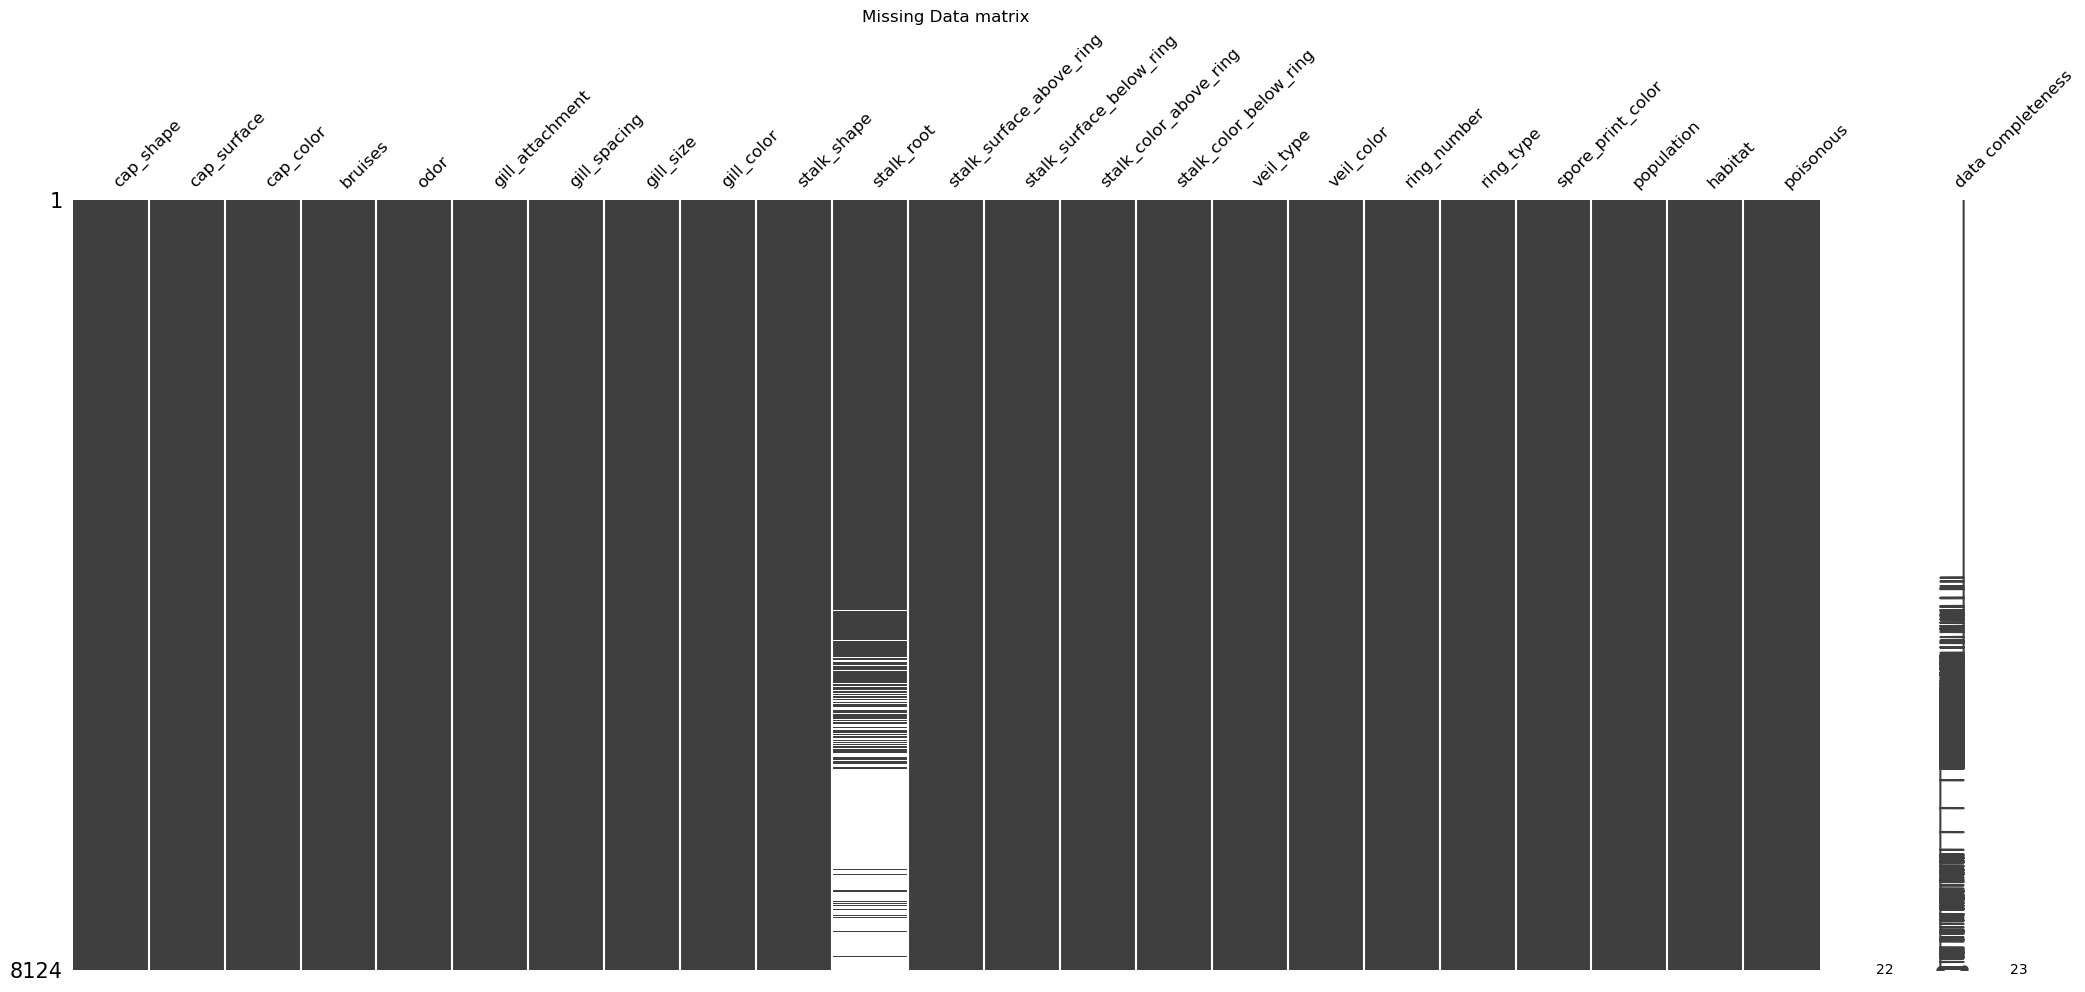

In [12]:
# Checking for missing values using a visualization
msno.matrix(mush, fontsize = 12, labels=True)
plt.title('Missing Data matrix')
#There are no missing values in this dataset.

In [13]:
mush["stalk_root"] = mush["stalk_root"].fillna("n")

Text(0.5, 1.0, 'Missing Data matrix')

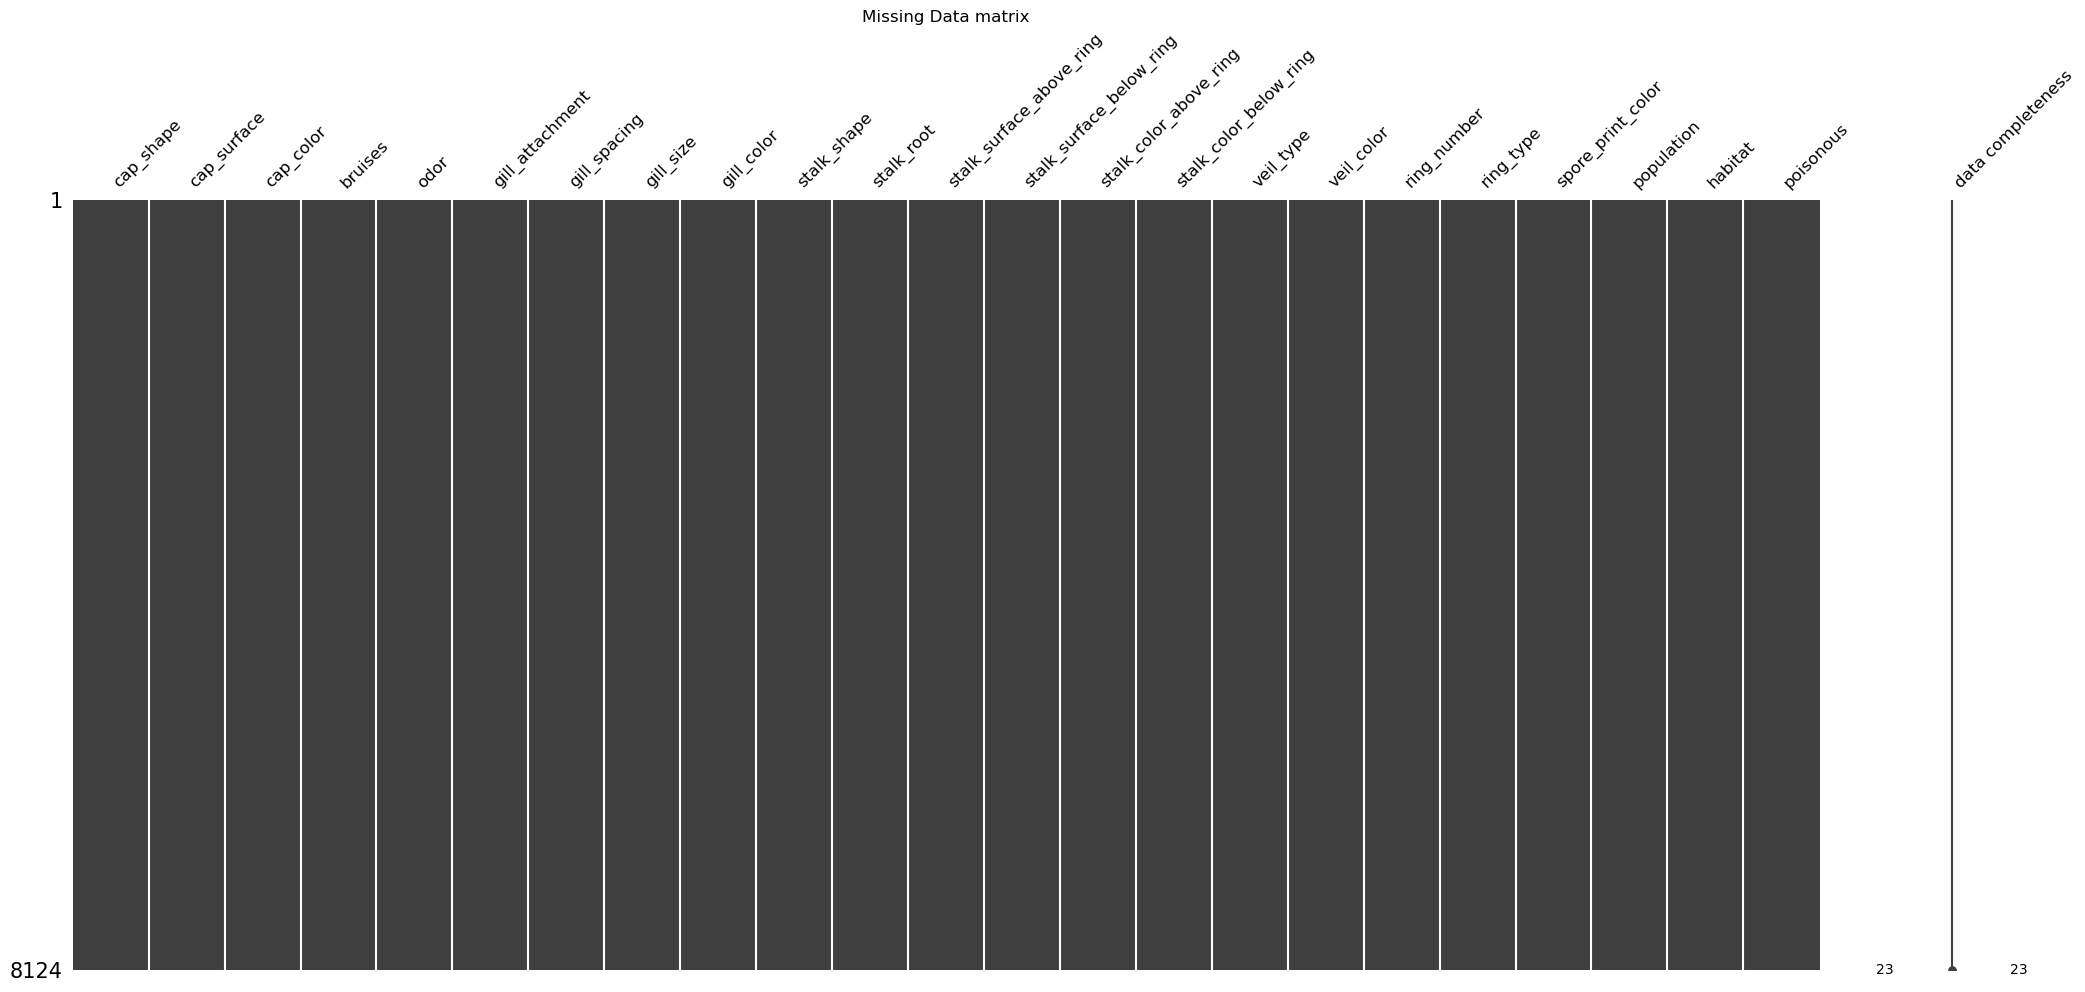

In [14]:
# Checking for missing values using a visualization
msno.matrix(mush, fontsize = 12, labels=True)
plt.title('Missing Data matrix')
#There are no missing values in this dataset.

Text(0.5, 0, 'veil_color')

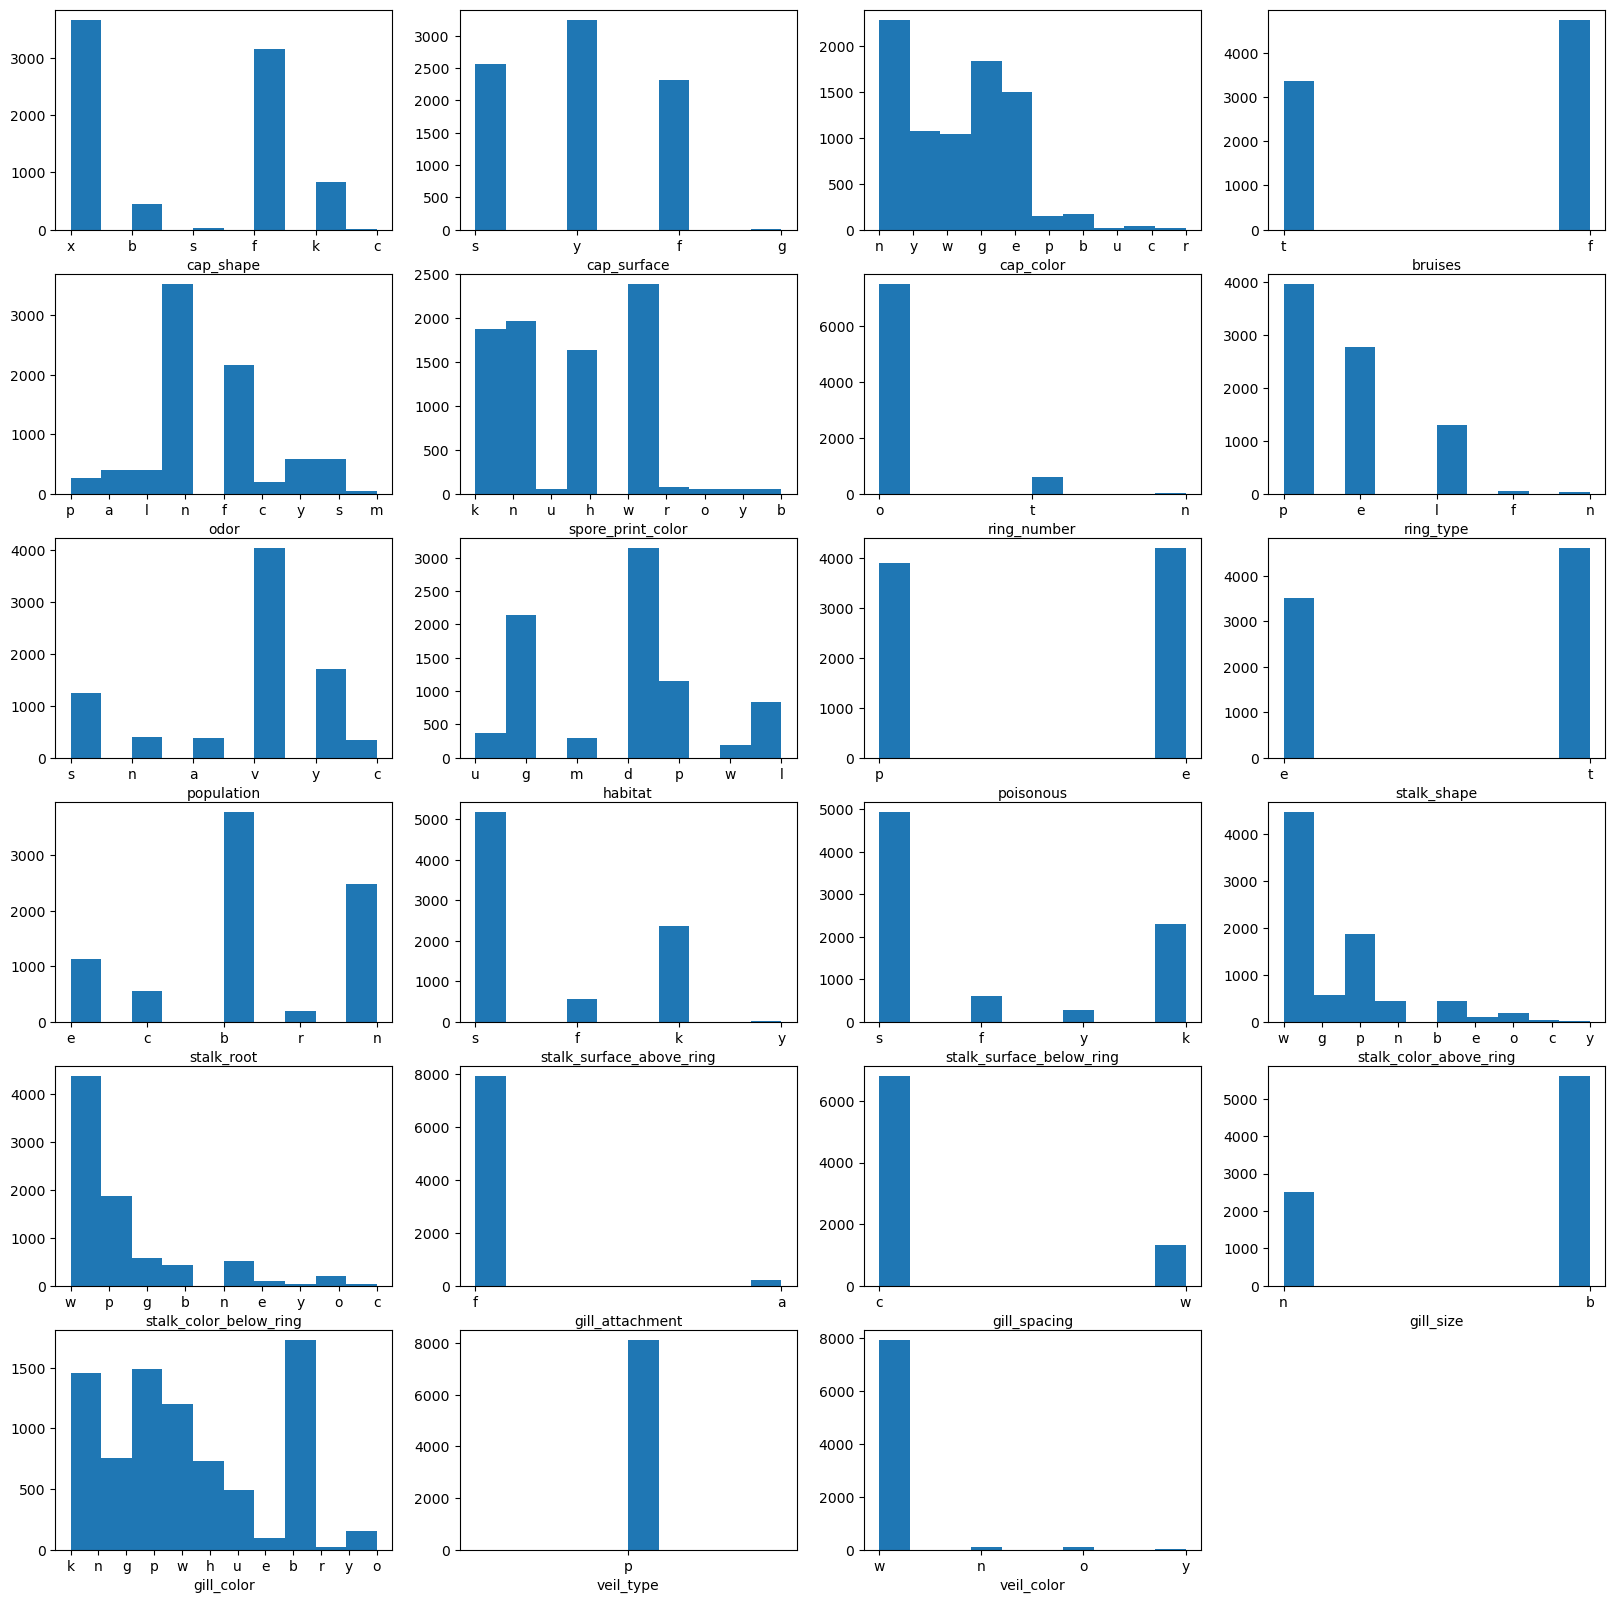

In [15]:
#[In_Text Citation: (Dhanu, n.d.)]
fig = plt.figure(figsize=(20, 20))
# setting values to rows and column variables
rows_u = 6
columns_u = 4
#Col1, Row1 Chart
fig.add_subplot(rows_u, columns_u, 1)
plt.hist(mush['cap_shape'])
plt.xlabel('cap_shape')
#Col2, Row1 Chart
fig.add_subplot(rows_u, columns_u, 2)
plt.hist(mush['cap_surface'])
plt.xlabel('cap_surface')
#Col3, Row1 Chart
fig.add_subplot(rows_u, columns_u, 3)
plt.hist(mush['cap_color'])
plt.xlabel('cap_color')
#Col4, Row1 Chart
fig.add_subplot(rows_u, columns_u, 4)
plt.hist(mush['bruises'])
plt.xlabel('bruises')
#Col1, Row2 Chart
fig.add_subplot(rows_u, columns_u, 5)
plt.hist(mush['odor'])
plt.xlabel('odor')
#Col2, Row2 Chart
fig.add_subplot(rows_u, columns_u, 6)
plt.hist(mush['spore_print_color'])
plt.xlabel('spore_print_color')
#Col3, Row2 Chart
fig.add_subplot(rows_u, columns_u, 7)
plt.hist(mush['ring_number'])
plt.xlabel('ring_number')
#Col4, Row2 Chart
fig.add_subplot(rows_u, columns_u, 8)
plt.hist(mush['ring_type'])
plt.xlabel('ring_type')
#Col1, Row3 Chart
fig.add_subplot(rows_u, columns_u, 9)
plt.hist(mush['population'])
plt.xlabel('population')
#Col2, Row3 Chart
fig.add_subplot(rows_u, columns_u, 10)
plt.hist(mush['habitat'])
plt.xlabel('habitat')
#Col3, Row3 Chart
fig.add_subplot(rows_u, columns_u, 11)
plt.hist(mush['poisonous'])
plt.xlabel('poisonous')
#Col4, Row3 Chart
fig.add_subplot(rows_u, columns_u, 12)
plt.hist(mush['stalk_shape'])
plt.xlabel('stalk_shape')
#Col1, Row4 Chart
fig.add_subplot(rows_u, columns_u, 13)
plt.hist(mush['stalk_root'])
plt.xlabel('stalk_root')
#Col2, Row4 Chart
fig.add_subplot(rows_u, columns_u, 14)
plt.hist(mush['stalk_surface_above_ring'])
plt.xlabel('stalk_surface_above_ring')
#Col3, Row4 Chart
fig.add_subplot(rows_u, columns_u, 15)
plt.hist(mush['stalk_surface_below_ring'])
plt.xlabel('stalk_surface_below_ring')
#Col4, Row4 Chart
fig.add_subplot(rows_u, columns_u, 16)
plt.hist(mush['stalk_color_above_ring'])
plt.xlabel('stalk_color_above_ring')
#Col1, Row5 Chart
fig.add_subplot(rows_u, columns_u, 17)
plt.hist(mush['stalk_color_below_ring'])
plt.xlabel('stalk_color_below_ring')
#Col2, Row5 Chart
fig.add_subplot(rows_u, columns_u, 18)
plt.hist(mush['gill_attachment'])
plt.xlabel('gill_attachment')
#Col3, Row5 Chart
fig.add_subplot(rows_u, columns_u, 19)
plt.hist(mush['gill_spacing'])
plt.xlabel('gill_spacing')
#Col4, Row5 Chart
fig.add_subplot(rows_u, columns_u, 20)
plt.hist(mush['gill_size'])
plt.xlabel('gill_size')
#Col1, Row6 Chart
fig.add_subplot(rows_u, columns_u, 21)
plt.hist(mush['gill_color'])
plt.xlabel('gill_color')
#Col2, Row6 Chart
fig.add_subplot(rows_u, columns_u, 22)
plt.hist(mush['veil_type'])
plt.xlabel('veil_type')
#Col3, Row6 Chart
fig.add_subplot(rows_u, columns_u, 23)
plt.hist(mush['veil_color'])
plt.xlabel('veil_color')

In [16]:
#cap_shape
#cap_surface
#cap_color
#bruises 
#odor 
#gill_attachment
#gill_spacing
#gill_size  
#gill_color 
#stalk_shape   
#stalk_root
#stalk_surface_above_ring
#stalk_surface_below_ring
# stalk_color_above_ring
# stalk_color_below_ring
# veil_type
# veil_color 
# ring_number    
# ring_type  
# spore_print_color
# population 
# habitat        
# poisonous    

In [17]:
#Based on this analysis, encoding the true/false value for bruises 
mush['bruises'] = mush['bruises'].map(bruises)
mush['poisonous'] = mush['poisonous'].map(classification)
#removing the veiltype column as all mushroom sin this particular dataset have partial veils 
mush.drop(['veil_type'], axis=1, inplace=True)

In [18]:
mush

cap_shape cap_surface cap_color  bruises odor gill_attachment  \
0            x           s         n        1    p               f   
1            x           s         y        1    a               f   
2            b           s         w        1    l               f   
3            x           y         w        1    p               f   
4            x           s         g        0    n               f   
...        ...         ...       ...      ...  ...             ...   
8119         k           s         n        0    n               a   
8120         x           s         n        0    n               a   
8121         f           s         n        0    n               a   
8122         k           y         n        0    y               f   
8123         x           s         n        0    n               a   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  ...   
2               c         b          n           e  ...   
3               c         n          n           e  ...   
4               w         b          k           t  ...   
...           ...       ...        ...         ...  ...   
8119            c         b          y           e  ...   
8120            c         b          y           e  ...   
8121            c         b          n           e  ...   
8122            c         n          b           t  ...   
8123            c         b          y           e  ...   

     stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil_color ring_number ring_type spore_print_color population habitat  \
0             w           o         p                 k          s       u   
1             w           o         p                 n          n       g   
2             w           o         p                 n          n       m   
3             w           o         p                 k          s       u   
4             w           o         e                 n          a       g   
...         ...         ...       ...               ...        ...     ...   
8119          o           o         p                 b          c       l   
8120          n           o         p                 b          v       l   
8121          o           o         p                 b          c       l   
8122          w           o         e                 w          v       l   
8123          o           o         p                 o          c       l   

     poisonous  
0            1  
1            0  
2            0  
3            1  
4            0  
...        ...  
8119         0  
8120         0  
8121         0  
8122         1  
8123         0  

[8124 rows x 22 columns]

In [19]:
cols = mush.columns

In [22]:
cols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [21]:
cols = cols.drop(['poisonous'])

In [23]:
#OneHot Encoding for all columns except the target (bruises)
mush_enc = pd.get_dummies(mush, columns = cols, drop_first=True)

In [24]:
mush_enc.to_csv('C:\\Users\\gmiel\\OneDrive\\WGU_MSDA\\D214 - Data Analytics Graduate Capstone\\Output\\Mush_enc.csv',  index=False)

In [25]:
mush_enc

poisonous  cap_shape_c  cap_shape_f  cap_shape_k  cap_shape_s  \
0             1            0            0            0            0   
1             0            0            0            0            0   
2             0            0            0            0            0   
3             1            0            0            0            0   
4             0            0            0            0            0   
...         ...          ...          ...          ...          ...   
8119          0            0            0            1            0   
8120          0            0            0            0            0   
8121          0            0            1            0            0   
8122          1            0            0            1            0   
8123          0            0            0            0            0   

      cap_shape_x  cap_surface_g  cap_surface_s  cap_surface_y  cap_color_c  \
0               1              0              1              0            0   
1               1              0              1              0            0   
2               0              0              1              0            0   
3               1              0              0              1            0   
4               1              0              1              0            0   
...           ...            ...            ...            ...          ...   
8119            0              0              1              0            0   
8120            1              0              1              0            0   
8121            0              0              1              0            0   
8122            0              0              0              1            0   
8123            1              0              1              0            0   

      ...  population_n  population_s  population_v  population_y  habitat_g  \
0     ...             0             1             0             0          0   
1     ...             1             0             0             0          1   
2     ...             1             0             0             0          0   
3     ...             0             1             0             0          0   
4     ...             0             0             0             0          1   
...   ...           ...           ...           ...           ...        ...   
8119  ...             0             0             0             0          0   
8120  ...             0             0             1             0          0   
8121  ...             0             0             0             0          0   
8122  ...             0             0             1             0          0   
8123  ...             0             0             0             0          0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          0          1          0  
1             0          0          0          0          0  
2             0          1          0          0          0  
3             0          0          0          1          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
8119          1          0          0          0          0  
8120          1          0          0          0          0  
8121          1          0          0          0          0  
8122          1          0          0          0          0  
8123          1          0          0          0          0  

[8124 rows x 96 columns]

In [27]:
# Assign values to X for all predictor features
# Assign values to y for the target variable
X = mush_enc.drop(columns=['poisonous'])
y = mush_enc['poisonous']
feature_names = X.columns
# Initialize the class and call fit_transform
skbest = SelectKBest(score_func = f_classif, k='all') # k=10
X_new = skbest.fit_transform(X, y)
### Finding P-values to select statistically significant features 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]
# Print the name of the selected features
print(features_to_keep)

45    stalk_surface_above_ring_k
23                        odor_p
24                        odor_s
25                        odor_y
57      stalk_color_above_ring_w
                 ...            
58      stalk_color_above_ring_y
8                    cap_color_c
4                    cap_shape_x
0                    cap_shape_c
5                  cap_surface_g
Name: Feature, Length: 93, dtype: object


In [28]:
len(features_to_keep)

93

In [30]:
len(mush_enc.columns)

96

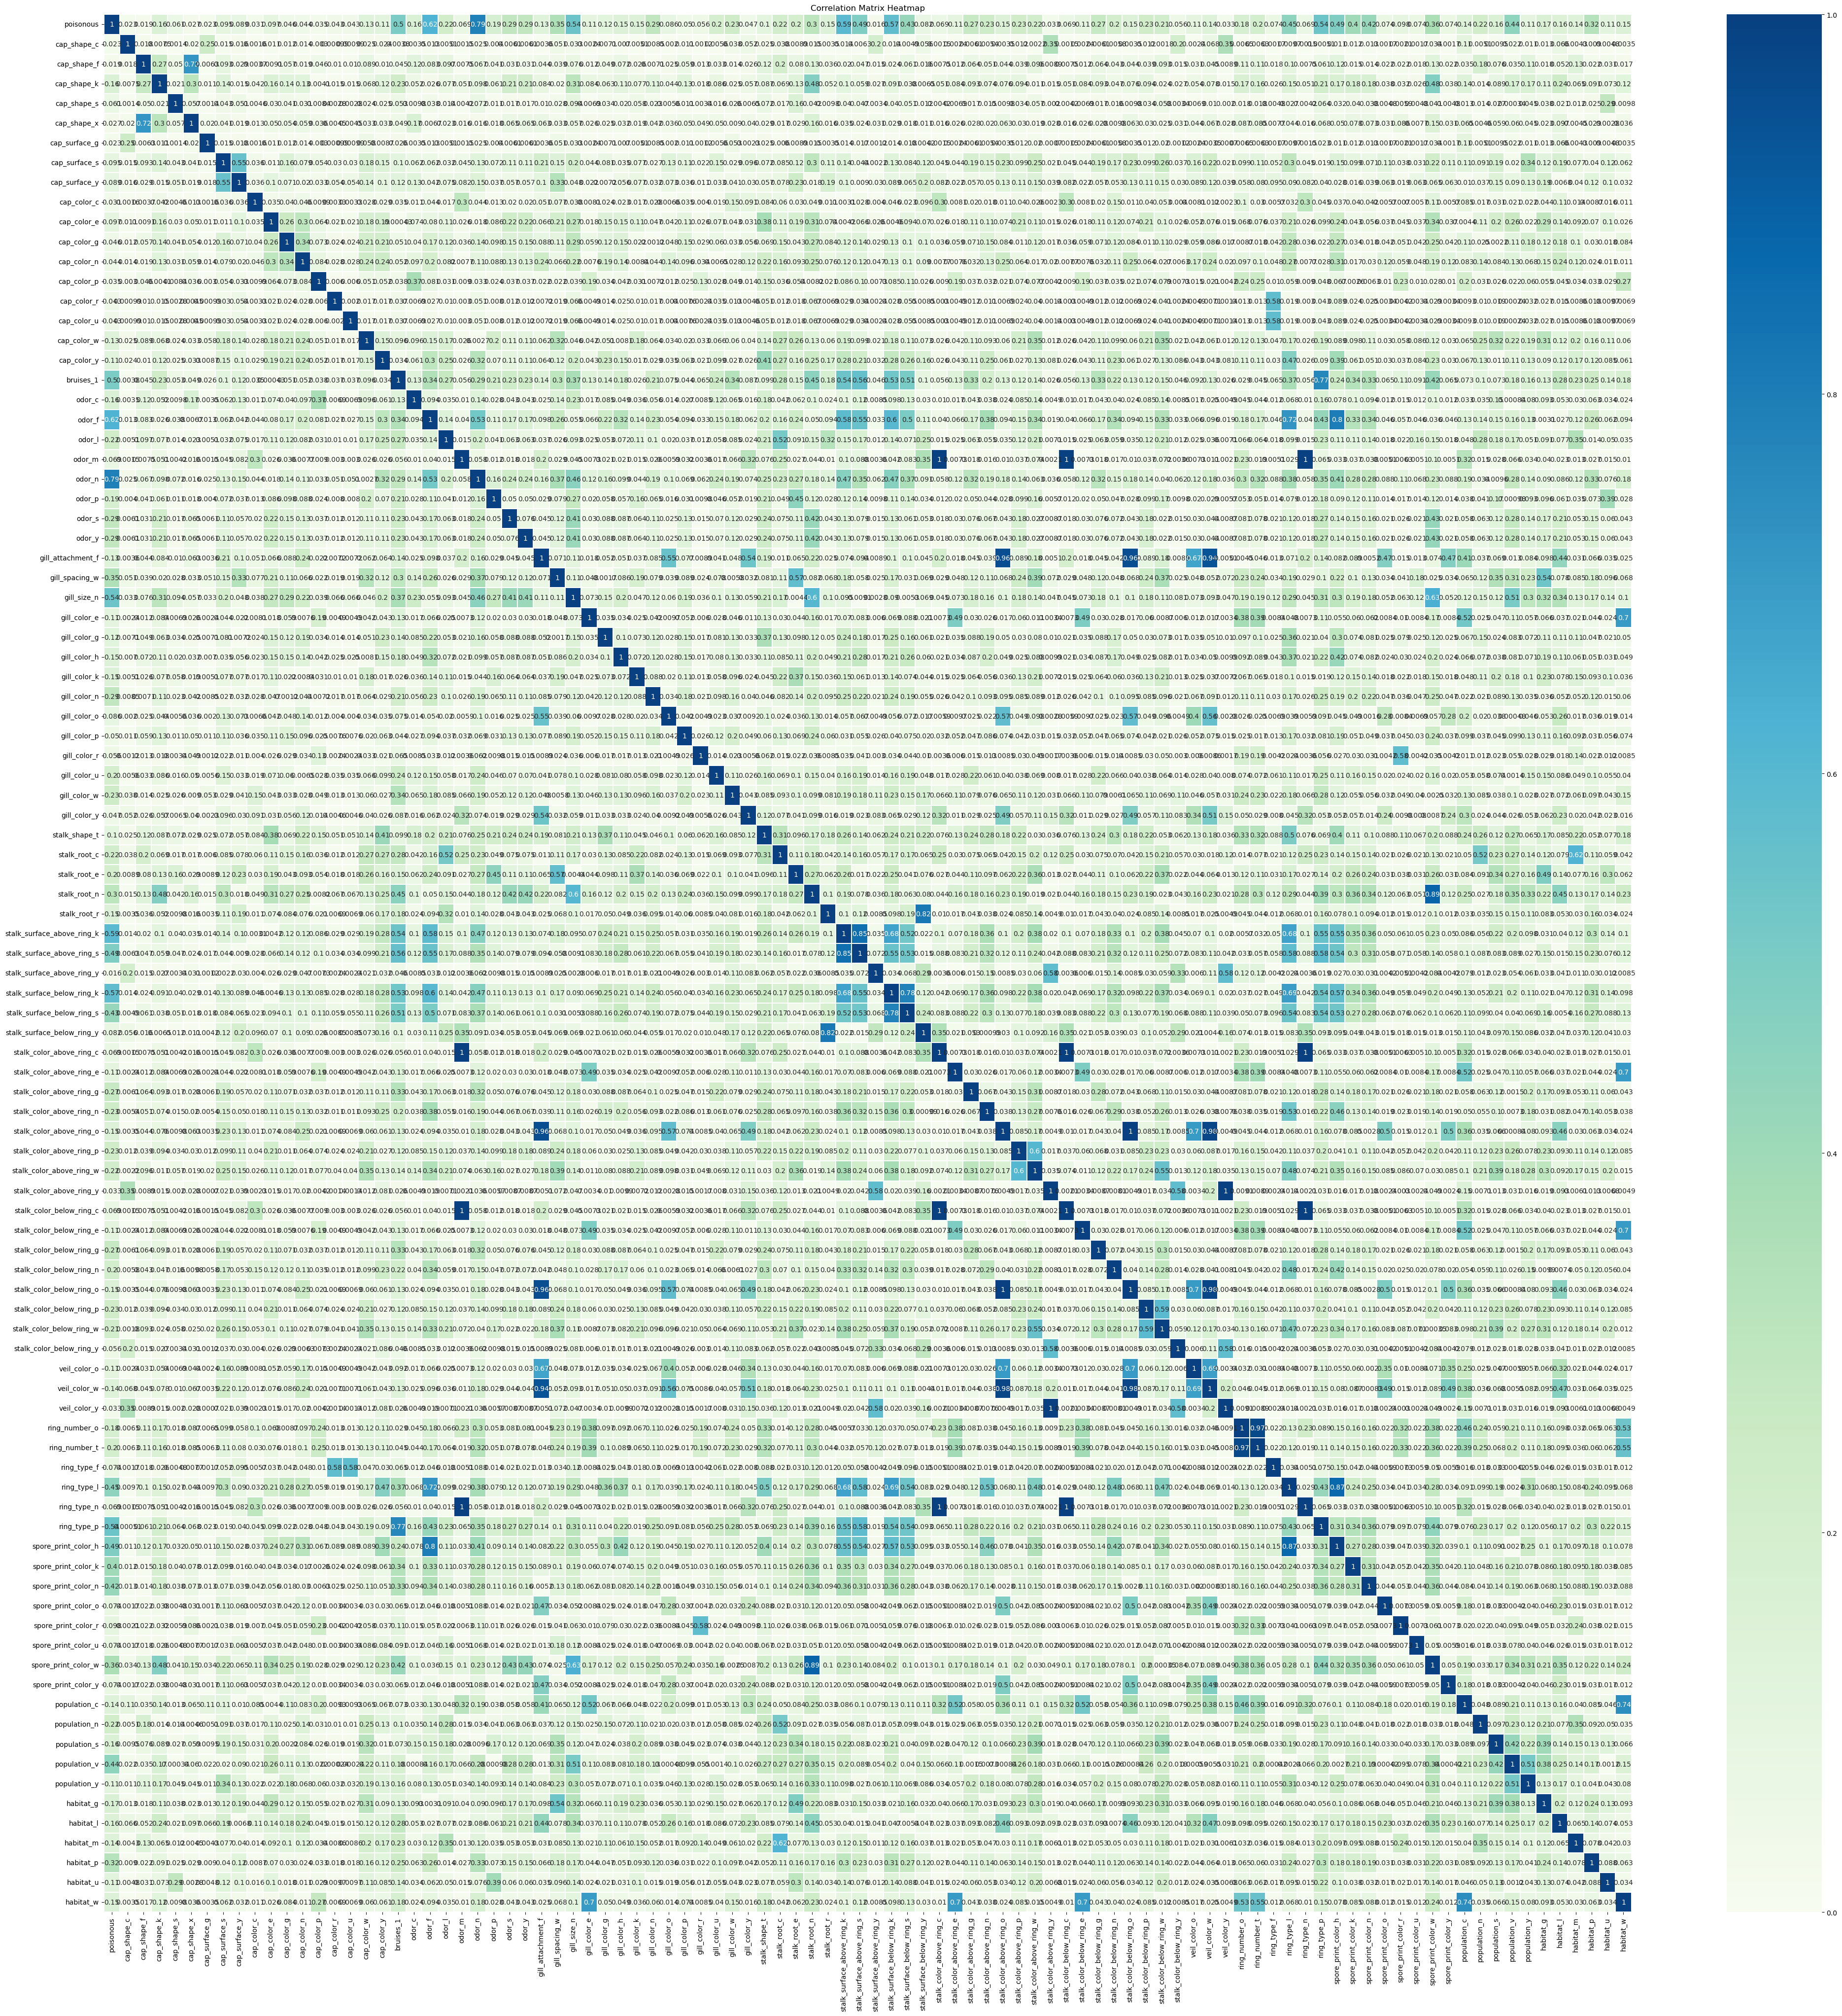

In [32]:
#[In-Text Citation: (daython3, n.d.)]
# Creating a correlation matrix
corr_matrix = mush_enc.corr().abs()
# Ploting the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 81, stratify = y)

In [34]:
#Hyperparameter tuning using GridSearchCV to try values of K from 5 to 30
kf = KFold(n_splits=5, shuffle=True, random_state=81)
#Setting up a parameter grid
param_grid = {'n_neighbors' : np.arange(5,30)}
#instantiating the model
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid, cv=kf)
#fitting the data
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'n_neighbors': 5}
1.0


In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)
#fitting the model with the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

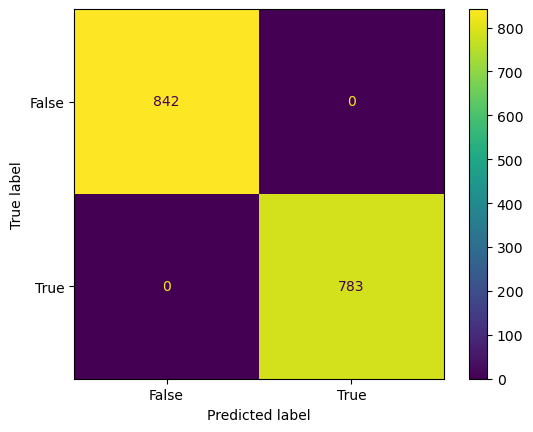

[[842   0]
 [  0 783]]


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(conf_matrix)

In [37]:
# Looking at just the Accuracy Score
print(knn.score(X_test, y_test))

1.0


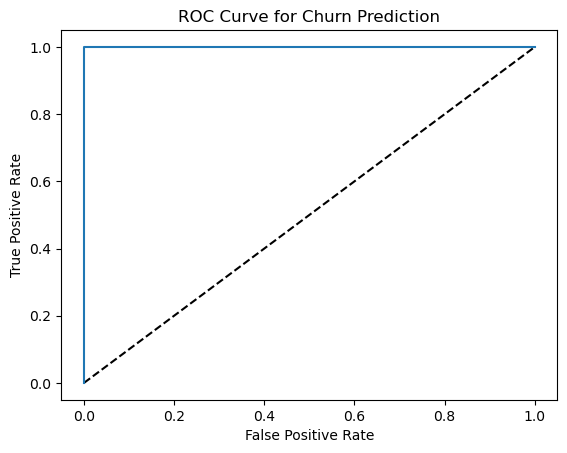

In [38]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.show()

In [39]:
#Calculating the AUC Score:
roc_auc_score(y_test, y_pred_prob)

1.0

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

